# Dispersion equation

The Dispersion equation is defined as:

$$
\nabla \cdot (\nabla^2\mathbf{u}) = \sum_j^I \frac{\partial}{\partial j}\sum_i^I \frac{\partial^2 u_i}{\partial i^2 }
$$

where $\xi$ is dispersivity.

## Solution in 1D

In [2]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_traj
from torchfsm.traj_recorder import AutoRecorder
device='cuda' if torch.cuda.is_available() else 'cpu'
L=1.0; N=128; 

In [ ]:
from torchfsm.operator import Dispersion

In [3]:
dispersion=0.01*Dispersion()
mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.sin(2*torch.pi*x/L)+torch.sin(4*torch.pi*x/L)
traj=dispersion.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

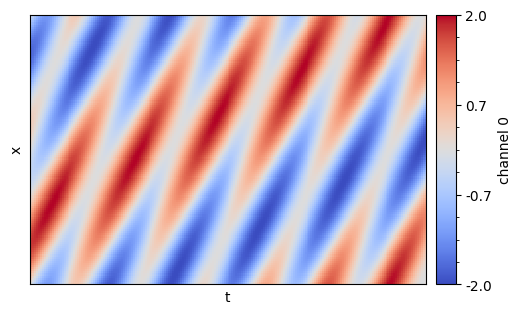

In [4]:
plot_traj(traj,animation=False)

## Solution in 2D

In [26]:
mesh=MeshGrid([(0,L,N)]*2,device=device)
x,y=mesh.bc_mesh_grid()
u_0=torch.sin(2*torch.pi*x/L)+torch.cos(4*torch.pi*y/L)+torch.sin(6*torch.pi*x/L)
traj=dispersion.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

In [27]:
plot_traj(traj)

## Solution in 3D

In [ ]:
mesh=MeshGrid([(0,L,N)]*3,device=device)
x,y,z=mesh.bc_mesh_grid()
u_0=torch.sin(2 * torch.pi * x / L) * torch.cos(
    2 * 2 * torch.pi * y / L
) * torch.sin(3 * 2 * torch.pi * z / L) + torch.sin(
    3 * 2 * torch.pi * x / L
) * torch.sin(
    4 * 2 * torch.pi * y / L
) * torch.cos(
    4 * 2 * torch.pi * z / L
)
traj=dispersion.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.001,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [37]:
plot_traj(traj,fps=10)